# Inflation data analytics
> Notes on numpy

- toc: true
- branch: master
- badges: true
- comments: true
- author: Stephen Zagar
- categories: [inflation, analytics]

BLS provides us with a Python API: https://www.bls.gov/developers/api_python.htm

[Ben Welsh](https://palewi.re/who-is-ben-welsh/) CPI library with Python, which is a wrapper around the BLS Python API.<br>
>`pip install cpi`

In [1]:
import pandas as pd
import cpi
import seaborn as sns
import matplotlib.pyplot as plt

/Users/szagar/miniconda3/envs/plotly/lib/python3.10/site-packages/cpi/__init__.py:46: StaleDataWarning: CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.
  warnings.warn(StaleDataWarning())


In [3]:
cpi.update()

In [4]:
cpi_items_df = cpi.series.get(seasonally_adjusted=False).to_dataframe()

In [5]:
cpi_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        1420 non-null   int64  
 1   date                        1420 non-null   object 
 2   value                       1420 non-null   float64
 3   series_id                   1420 non-null   object 
 4   series_title                1420 non-null   object 
 5   series_survey               1420 non-null   object 
 6   series_seasonally_adjusted  1420 non-null   bool   
 7   series_periodicity_id       1420 non-null   object 
 8   series_periodicity_code     1420 non-null   object 
 9   series_periodicity_name     1420 non-null   object 
 10  series_area_id              1420 non-null   object 
 11  series_area_code            1420 non-null   object 
 12  series_area_name            1420 non-null   object 
 13  series_items_id             1420 

#### DATA CLEANING
While the data is already extremely clean, it actually has more info that what we need, we just need the monthly periods and this data set has monthly and annual, let’s clean it up and also set a date index.

In [7]:
cpi_items_df = cpi_items_df[cpi_items_df['period_type']=='monthly']
cpi_items_df['date'] = pd.to_datetime(cpi_items_df['date'])
cpi_items_df = cpi_items_df.set_index('date')

<AxesSubplot:xlabel='date'>

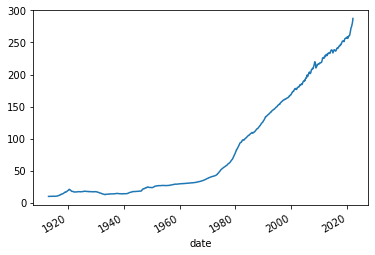

In [8]:
cpi_items_df['value'].plot()

#### Zoom in to a more current timeline.

Text(0, 0.5, 'CPI Value')

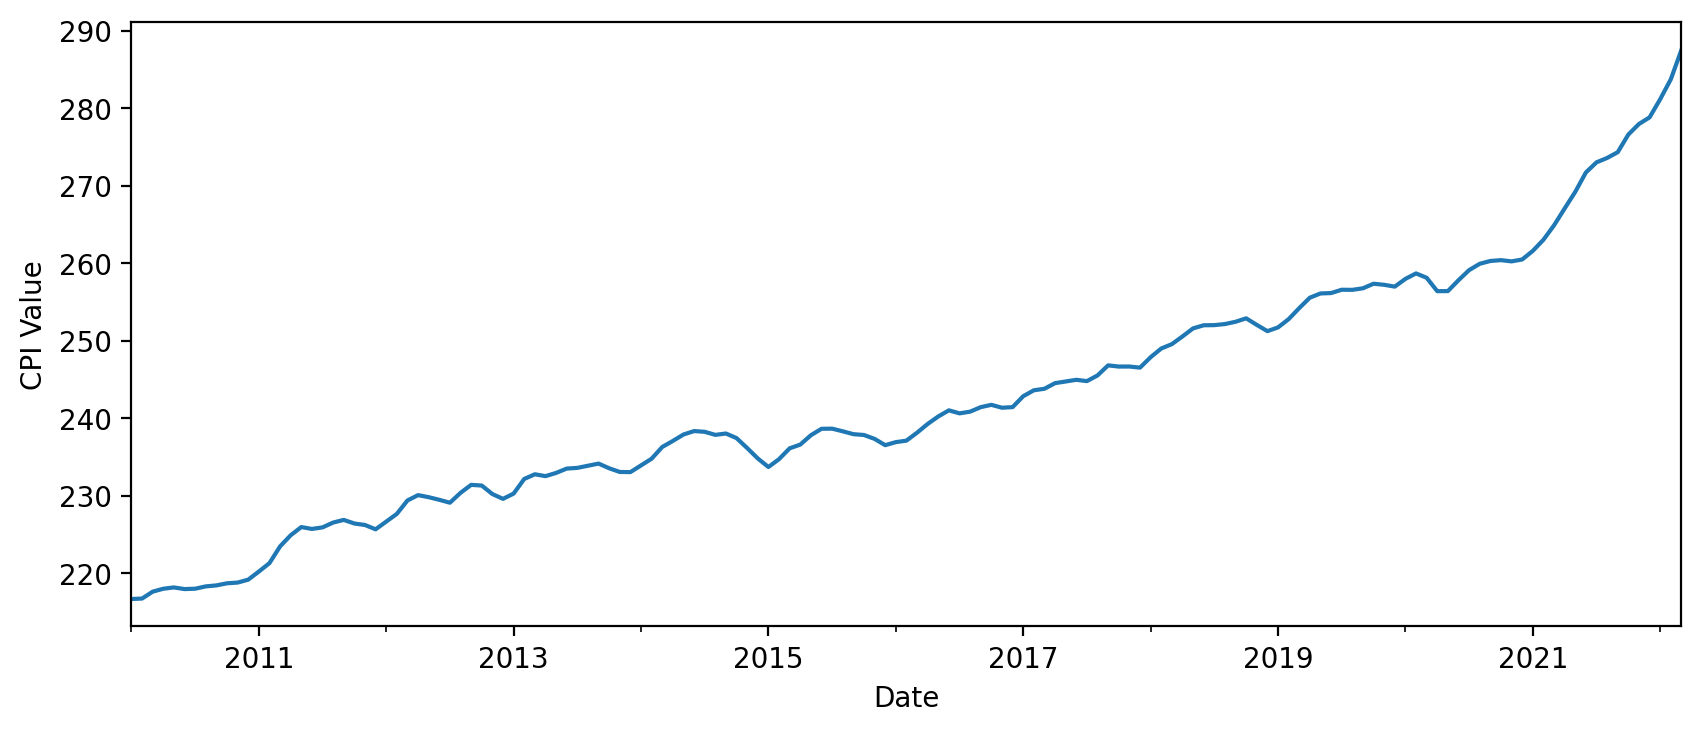

In [9]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['2010':'2023'].plot(figsize=(10,4))
plt.xlabel('Date')
plt.ylabel('CPI Value')

If we were targeting a yearly 2% inflation rate since 2010, let’s explore what this line would look like on the same plot, starting with the 2010 CPI value. We’ll do a very simple method for this (overly simplified, but it should work fine for our exploratoy data analysis), by simply looping through the values and adding the original plus 2% of the original. Then we can plot these values against the real data.

In [10]:
# Starting value
cpi_items_df['value'].loc['2010':'2023'].iloc[0]

216.687

In [12]:
start = cpi_items_df['value'].loc['2010':'2023'].iloc[0]
periods = len(cpi_items_df['value'].loc['2010':'2023'])//12

In [13]:
def get_target_cpi(previous_cpi):
    return previous_cpi + 0.02*(previous_cpi)

In [14]:
target_cpis = [start]
for year in range(0,periods):
    target_cpis.append(get_target_cpi(target_cpis[year]))

In [15]:
target_cpis

[216.687,
 221.02074000000002,
 225.44115480000002,
 229.949977896,
 234.54897745392,
 239.2399570029984,
 244.02475614305837,
 248.90525126591953,
 253.88335629123793,
 258.9610234170627,
 264.14024388540395,
 269.42304876311204,
 274.8115097383743]

In [16]:
len(target_cpis)

13

Creating a pandas series for the target CPIs starting in 2010:

In [17]:
dates = pd.date_range('2010-01-01','2023-01-01',periods=periods+1)
target_cpi_series = pd.Series(data =target_cpis, index= dates)

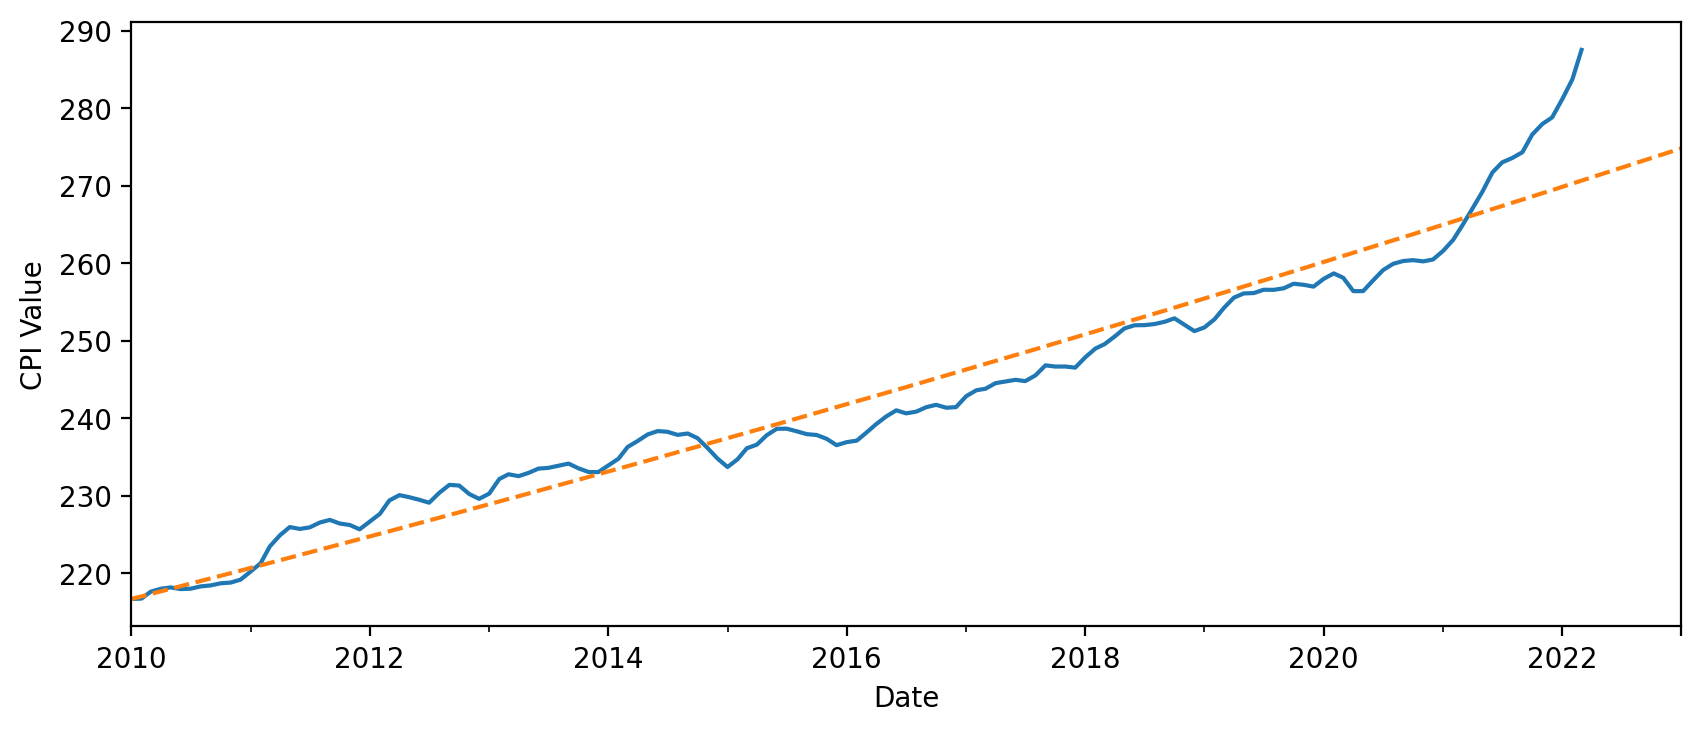

In [19]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['2010':'2023'].plot(figsize=(10,4))
target_cpi_series.plot(ls='--') 
plt.xlabel('Date')
plt.ylabel('CPI Value');

Looks like the Fed was actually doing a pretty good job at keeping things steady and the pandemic, stimulus, and supply chain really put strain on the inflation rate. How bad is this compared to the 1970s? Let’s compare…

INFLATION IN THE 1970s

In [20]:
# Starting value
cpi_items_df['value'].loc['1969':'1980'].iloc[0]

35.6

In [21]:
start = cpi_items_df['value'].loc['1969':'1980'].iloc[0]
periods = len(cpi_items_df['value'].loc['1969':'1980'])//12

In [22]:
def get_target_cpi(previous_cpi):
    return previous_cpi + 0.02*(previous_cpi)

In [23]:
target_cpis = [start]
for year in range(0,periods):
    target_cpis.append(get_target_cpi(target_cpis[year]))

In [24]:
target_cpis

[35.6,
 36.312000000000005,
 37.03824,
 37.7790048,
 38.534584896000005,
 39.305276593920006,
 40.091382125798404,
 40.89320976831437,
 41.71107396368066,
 42.54529544295428,
 43.39620135181336,
 44.26412537884963,
 45.14940788642662]

In [25]:
len(target_cpis)

13

Creating a pandas series for the target CPIs starting in 2010:

In [26]:
dates = pd.date_range('1969-01-01','1980-01-01',periods=periods+1)
target_cpi_series = pd.Series(data =target_cpis, index= dates)

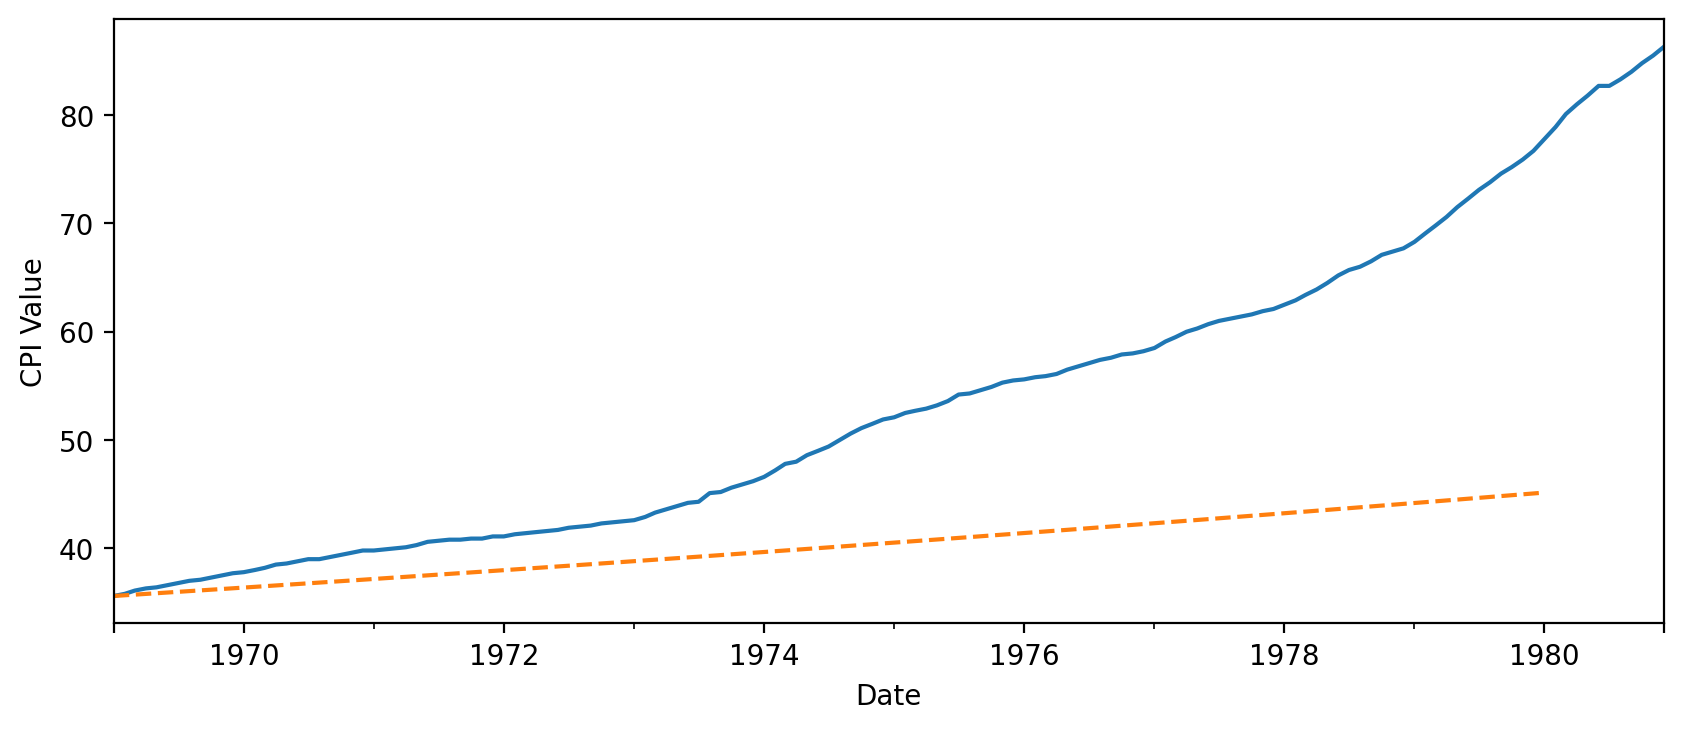

In [27]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['1969':'1980'].plot(figsize=(10,4))
target_cpi_series.plot(ls='--') 
plt.xlabel('Date')
plt.ylabel('CPI Value');

Wow, things were really bad in the 70s compared to today! Let’s see the change when Paul Volcker “broke the back” of inflation by substantially raising rates in the early 1980s.

#### Volcker “crushes” inflation:

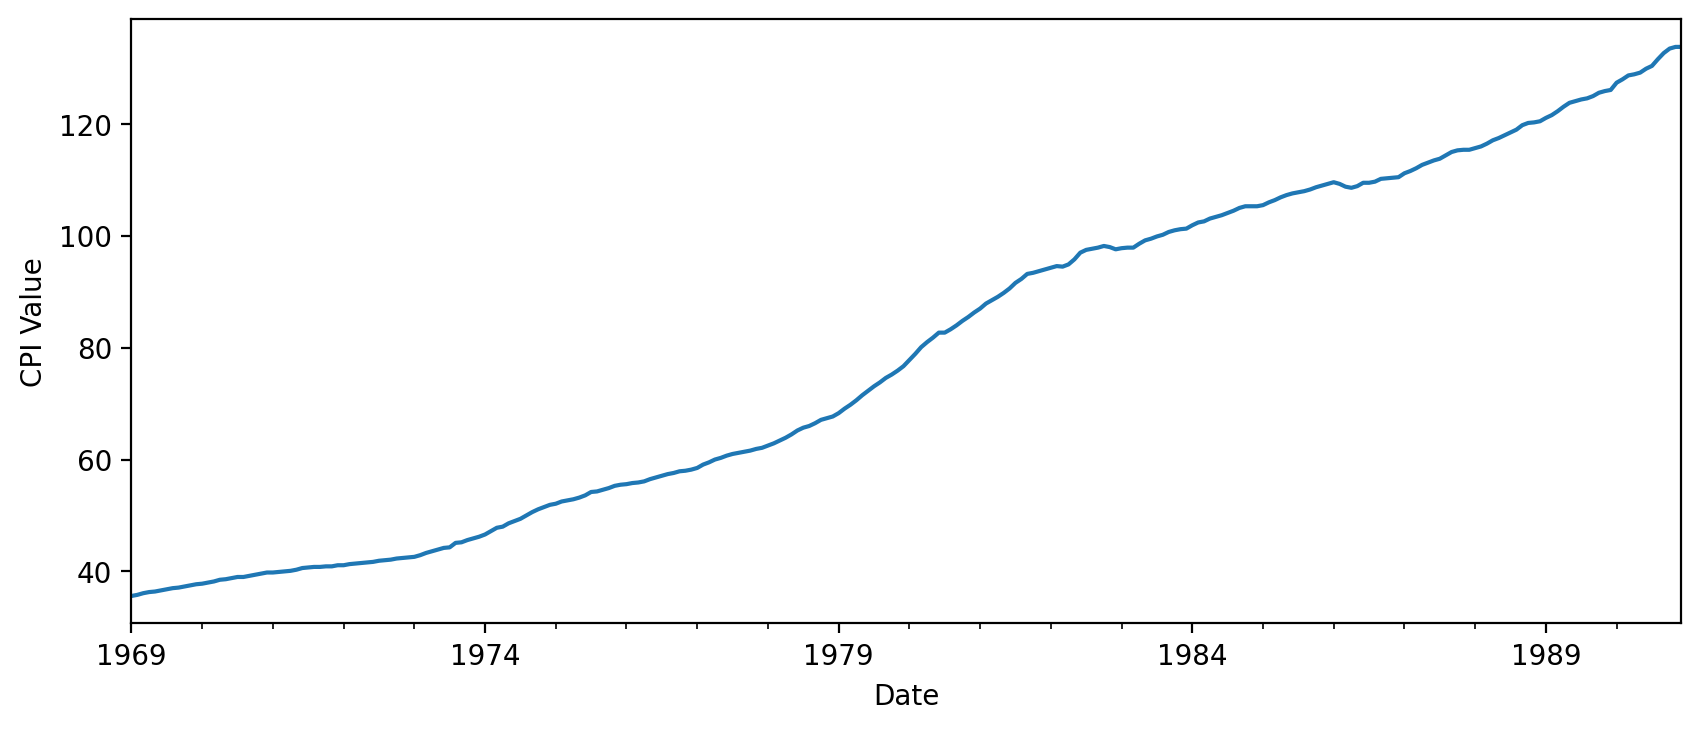

In [28]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['1969':'1990'].plot(figsize=(10,4))
plt.xlabel('Date')
plt.ylabel('CPI Value');

So far we’ve explored the raw CPI values, but we’re probably more interested in terms of percent change as is reported on the news (e.g. inflation came in at 6%). Let’s see the change in rates of inflation after Volcker dramatically hikes rates:

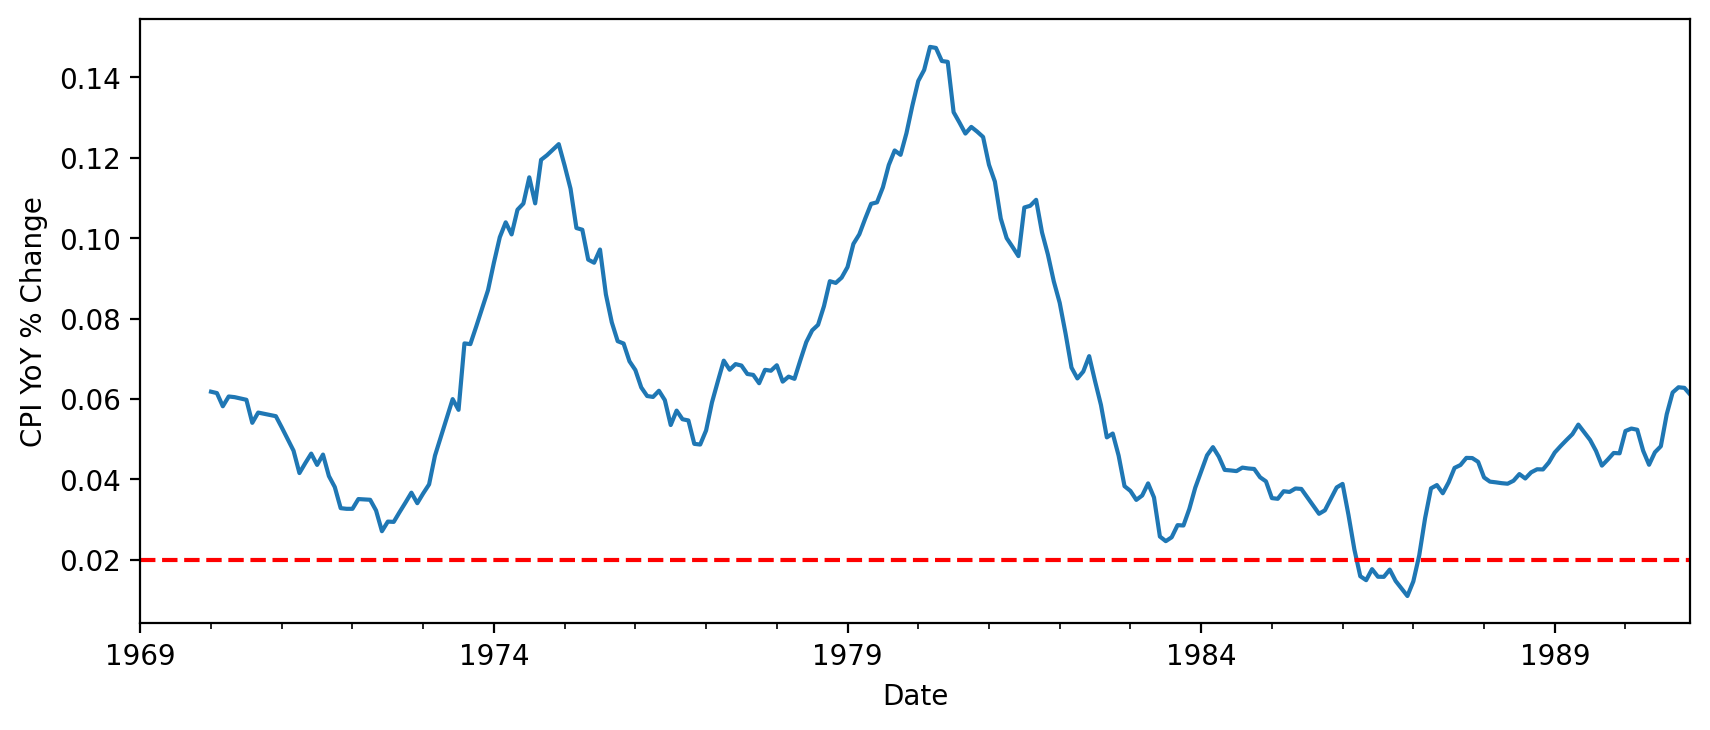

In [29]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['1969':'1990'].pct_change(12).plot(figsize=(10,4))
plt.axhline(0.02,ls='--',c='red')
plt.xlabel('Date')
plt.ylabel('CPI YoY % Change');

Now let’s do a similar plot for the current timeline:

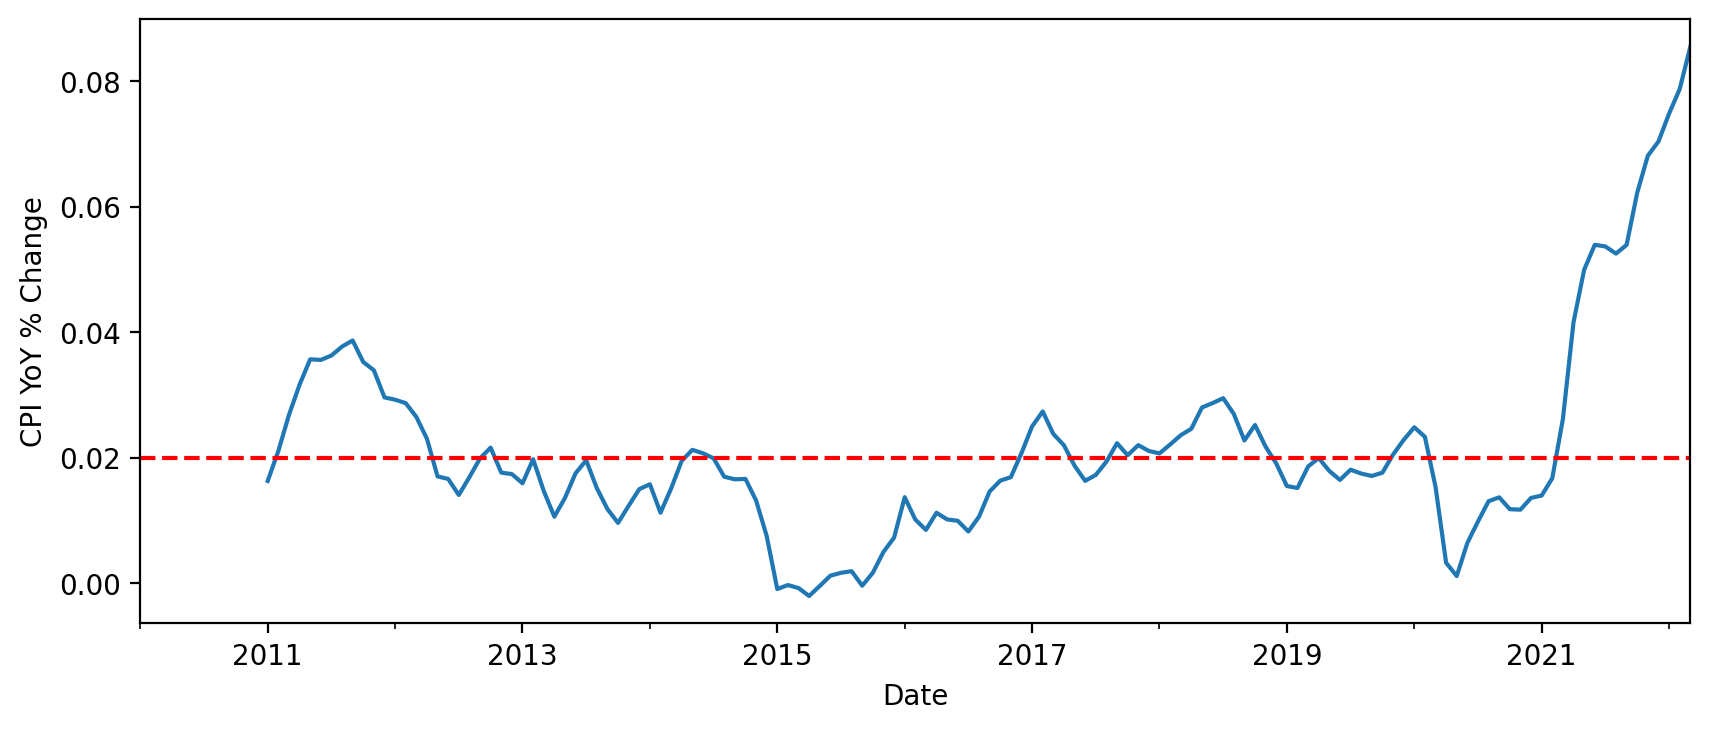

In [30]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['2010':'2023'].pct_change(12).plot(figsize=(10,4))
plt.axhline(0.02,ls='--',c='red')
plt.xlabel('Date')
plt.ylabel('CPI YoY % Change');

Looks like rates may have to rise quite a bit to solve this! We also have to consider supply chain issues and global macroeconomic changes (e.g. conflict in Ukraine) that can effect particular commodities, such as oil.

To conclude, let’s do a similar plot for only a single category: Gasoline (All Types):

In [31]:
gas = cpi.series.get(items="Gasoline (all types)", seasonally_adjusted=False).to_dataframe()

In [32]:
gas = gas[gas['period_type']=='monthly']
gas['date'] = pd.to_datetime(gas['date'])
gas = gas.set_index('date')

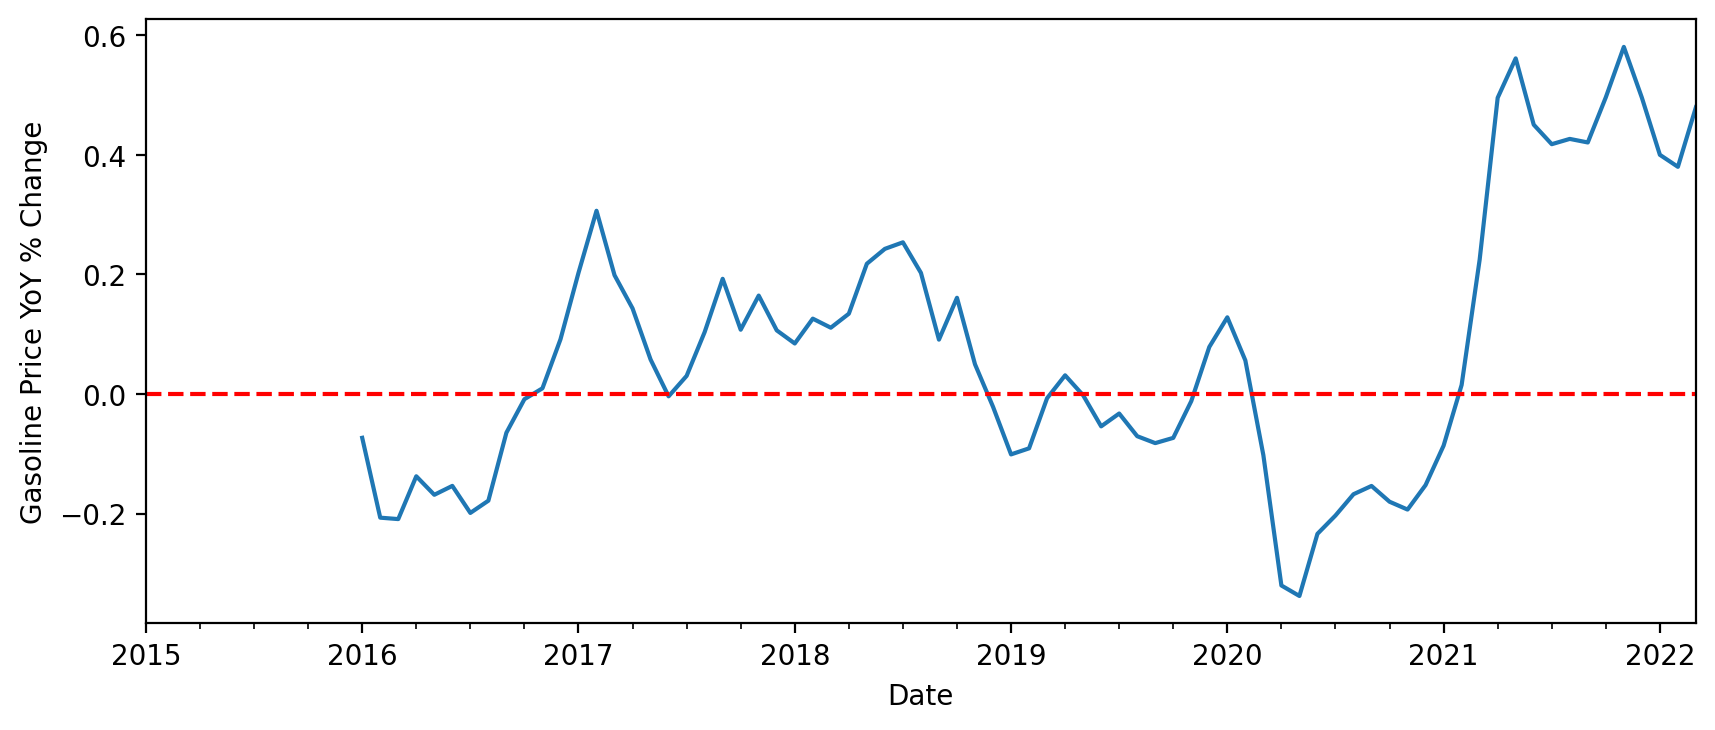

In [33]:
fig = plt.figure(dpi=200)
gas['value'].loc['2015':'2023'].pct_change(12).plot(figsize=(10,4))
plt.axhline(0,ls='--',c='red')
plt.xlabel('Date')
plt.ylabel('Gasoline Price YoY % Change');